Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
import time


### 1. Modelo Cinematica Directa:

$ x = L1 \cdot cos(\theta_1) + L2 \cdot cos(\theta_1 + \theta_2) $

$ y = L1 \cdot sin(\theta_1) + L2 \cdot sin(\theta_1 + \theta_2) $

Donde:
- \(L1\) y \(L2\) son las longitudes de los primeros y segundos segmentos del robot, respectivamente.
- \($\theta_1$) y \($\theta_2$) son los ángulos de las primeras y segundas articulaciones, respectivamente.


In [4]:
def plot_arm(theta1, theta2, L1, L2, ax):

    '''
    theta1: Ángulo del primer segmento (en grados)
    theta2: Ángulo del segundo segmento (en grados)
    L1: Longitud del primer segmento
    L2: Longitud del segundo segmento
    ax: Eje de matplotlib donde se dibujará el brazo
    '''
    ax.clear()  # Limpiar el dibujo anterior

    # Punto inicial (base del brazo)
    x0, y0 = (0, 0)
    
    # Punto final del primer segmento (L1)
    x1 = L1 * np.cos(np.radians(theta1))
    y1 = L1 * np.sin(np.radians(theta1))
    
    # Punto final del segundo segmento (L1 + L2)
    x2 = x1 + L2 * np.cos(np.radians(theta1 + theta2))
    y2 = y1 + L2 * np.sin(np.radians(theta1 + theta2))

    ax.plot([x0, x1], [y0, y1], 'b-', linewidth=5, label='L1')  # L1 segment
    ax.plot([x1, x2], [y1, y2], 'r-', linewidth=5, label='L2')  # L2 segment
    ax.scatter([x0, x1, x2], [y0, y1, y2], color='green', s=100)  # Joints

    # Anotar los ángulos
    ax.annotate(r'$\theta_1$=' + f'{theta1:.1f}', (x0 + L1/4, y0 + L1/4), fontsize=12, ha="center")
    ax.annotate(r'$\theta_2$=' + f'{theta2:.1f}', (x1 + L2/4, y1 + L2/4), fontsize=12, ha="center")
    
    # Ajustar detalles de visualización
    ax.set_xlim([-L1-L2, L1+L2])
    ax.set_ylim([-L1-L2, L1+L2])
    ax.set_aspect('equal')
    ax.grid(True, which='both')
    ax.axhline(y=0, color='k')
    ax.axvline(x=0, color='k')
    ax.legend()

    plt.pause(0.01)

### 2. Funcion de Cinematica Directa:

In [5]:
def directa(L1, L2, theta1, theta2):

    '''
    L1 ; largo del primer eslabon mm
    L2 ; largo del segundo eslabon mm
    theta1 ; angulo del primer eslabon grados
    theta2 ; angulo del segundo eslabon grados
    '''
 
    # Convertir grados a radianes
    theta1_rad = math.radians(theta1)
    theta2_rad = math.radians(theta2)
    
    # Calcular las coordenadas x e y
    x = L1 * math.cos(theta1_rad) + L2 * math.cos(theta1_rad + theta2_rad)
    y = L1 * math.sin(theta1_rad) + L2 * math.sin(theta1_rad + theta2_rad)
    
    return x, y

x, y =  9.659258262890685 16.730326074756157 mm


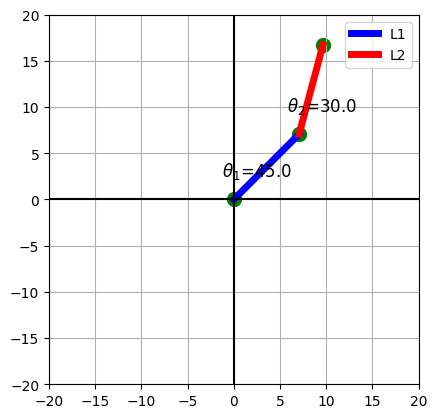

In [18]:
# Prueba de la función
L1 = 10  # milímetros
L2 = 10  # milímetros
t1 = 45  # grados
t2 = 30  # grados


x, y = directa(L1, L2, t1, t2)


print("x, y = ", x, y, "mm")
fig, ax = plt.subplots() 
plot_arm(t1, t2, L1, L2, ax)

### 3. Formulas de Torque
$ \tau1 = (m1 + m2) \cdot g \cdot L1 \cdot \cos(\theta1)+m2\cdot g \cdot L2 \cdot \cos(\theta1 + \theta2) $

$ \tau2 = m2 \cdot g \cdot L2 \cdot \cos(\theta1 + \theta2) $

Donde:
- $τ1$ y $τ2$  son los torques en las primeras y segundas articulaciones, respectivamente.
- $m1$ y $m2$ son las masas de los primeros y segundos segmentos del robot, respectivamente.
- $g$ es la aceleración debido a la gravedad (9.81 m/s² o 9810 mm/s²)


### 4. Funcion de torque

In [17]:
def torque(L1, L2, m1, m2, g, theta1, theta2):

    '''
    L1 ; largo del primer eslabon 
    L2 ; largo del segundo eslabon
    m1 ; masa del primer eslabon kg
    m2 ; masa del segundo eslabon kg 
    g ; gravedad mm/s² 
    theta1 ; angulo del primer eslabon
    theta2 ; angulo del segundo eslabon
    '''

    # Convertir grados a radianes
    theta1_rad = math.radians(theta1)
    theta2_rad = math.radians(theta2)
    
    # Calcular los torques
    tau1 = (m1 + m2) * g * L1 * math.cos(theta1_rad) + m2 * g * L2 * math.cos(theta1_rad + theta2_rad)
    tau2 = m2 * g * L2 * math.cos(theta1_rad + theta2_rad)
    
    return tau1, tau2

In [16]:
# Prueba de la función
m1 = 5  # kg
m2 = 5  # kg
g = 9810  # mm/s²

tau1, tau2 = torque(L1, L2, m1, m2, g, t1, t2) 
print("tau1 =", tau1, "N.mm")
print("tau2 =", tau2, "N.mm")

tau1 = 820622.4939667897 N.mm
tau2 = 126950.74162278653 N.mm


### 5. Modelo de cinematica inversa

$ \theta_2 = \arccos \left( \frac{x^2 + y^2 - L1^2 - L2^2}{2 \cdot L1 \cdot L2} \right) $

$ \theta_1 = \arctan2 \left( y, x \right) - \arctan2 \left( L2 \cdot \sin(\theta_2), L1 + L2 \cdot \cos(\theta_2) \right) $

Donde:
- \( $\theta_1$ ) y \( $\theta_2$ ) son los ángulos de las primeras y segundas articulaciones, respectivamente, requeridos para que el efector final alcance la posición objetivo \( (x, y) \).
- \( $L1$ ) y \( $L2$ \) son las longitudes de los primeros y segundos segmentos del robot, respectivamente.
- \( $x$ \) e \( $y$ \) son las coordenadas objetivo del efector final.


### 6. Funcion de cinematica inversa

In [19]:
def inversa(L1, L2, x, y):

    '''
    L1 ; largo del primer eslabon mm
    L2 ; largo del segundo eslabon mm
    x ; coordenada x
    y ; coordenada y
    '''
        
    # Calcular theta2
    numerador_theta2 = x**2 + y**2 - L1**2 - L2**2
    denominador_theta2 = 2*L1*L2
    cos_theta2 = numerador_theta2 / denominador_theta2
    cos_theta2 = np.clip(cos_theta2, -1, 1)  # Clamp cos_theta2 al rango [-1, 1]
    theta2_rad_1 = np.arccos(cos_theta2)
    theta2_rad_2 = -theta2_rad_1
    
    # Calcular theta1 para ambas soluciones de theta2
    numerador_theta1_1 = L2 * np.sin(theta2_rad_1)
    denominador_theta1_1 = L1 + L2 * np.cos(theta2_rad_1)
    theta1_rad_1 = np.arctan2(y, x) - np.arctan2(numerador_theta1_1, denominador_theta1_1)
    
    numerador_theta1_2 = L2 * np.sin(theta2_rad_2)
    denominador_theta1_2 = L1 + L2 * np.cos(theta2_rad_2)
    theta1_rad_2 = np.arctan2(y, x) - np.arctan2(numerador_theta1_2, denominador_theta1_2)
    
    # Convertir radianes a grados
    theta1_1 = np.degrees(theta1_rad_1)
    theta2_1 = np.degrees(theta2_rad_1)
    theta1_2 = np.degrees(theta1_rad_2)
    theta2_2 = np.degrees(theta2_rad_2)
    
    return (theta1_1, theta2_1), (theta1_2, theta2_2)

theta1 = (-9.826193107021835, 117.81813928465394) grados
theta2 = (62.95629546117782, -117.81813928465394) grados


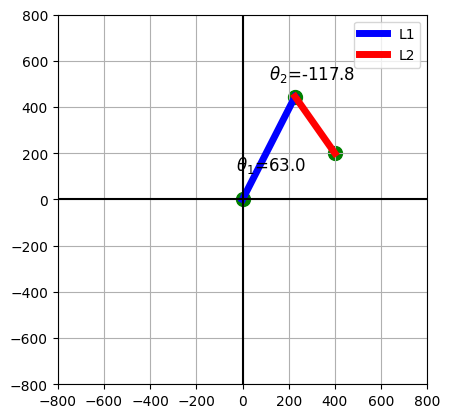

In [28]:

# Prueba de la función
x_objetivo = 400  # mm
y_objetivo = 200  # mm
L1 = 500  # mm
L2 = 300  # mm

theta1_objetivo, theta2_objetivo = inversa(L1, L2, x_objetivo, y_objetivo)
print("theta1 =", theta1_objetivo, "grados")
print("theta2 =", theta2_objetivo, "grados")
fig, ax = plt.subplots()
plot_arm(theta2_objetivo[0], theta2_objetivo[1], L1, L2, ax)

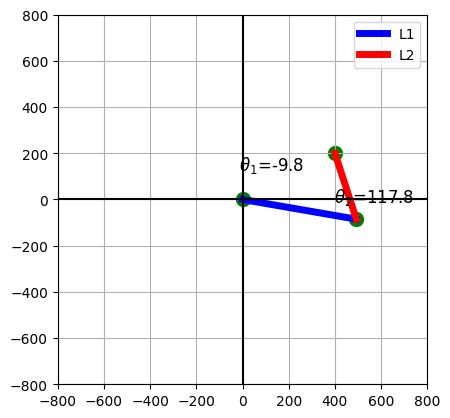

In [30]:
fig, ax = plt.subplots()
plot_arm(theta1_objetivo[0], theta1_objetivo[1], L1, L2, ax)

### 7. Espacio de trabajo del robot

In [60]:
# Crear un conjunto de valores de theta1 y theta2
theta1_vals = np.linspace(0, 90)  # de 0° a 90°
theta2_vals = np.linspace(0, 90)  # de 0° a 90°

L1 = 15  # milímetros
L2 = 10  # milímetros

# Inicializar una lista para almacenar las coordenadas x e y alcanzables
x_vals = []
y_vals = []

# Calcular las coordenadas x e y para todos los valores de theta1 y theta2
for theta1 in theta1_vals:
    for theta2 in theta2_vals:
        x, y = directa(L1, L2, theta1, theta2)
        x_vals.append(x)
        y_vals.append(y)


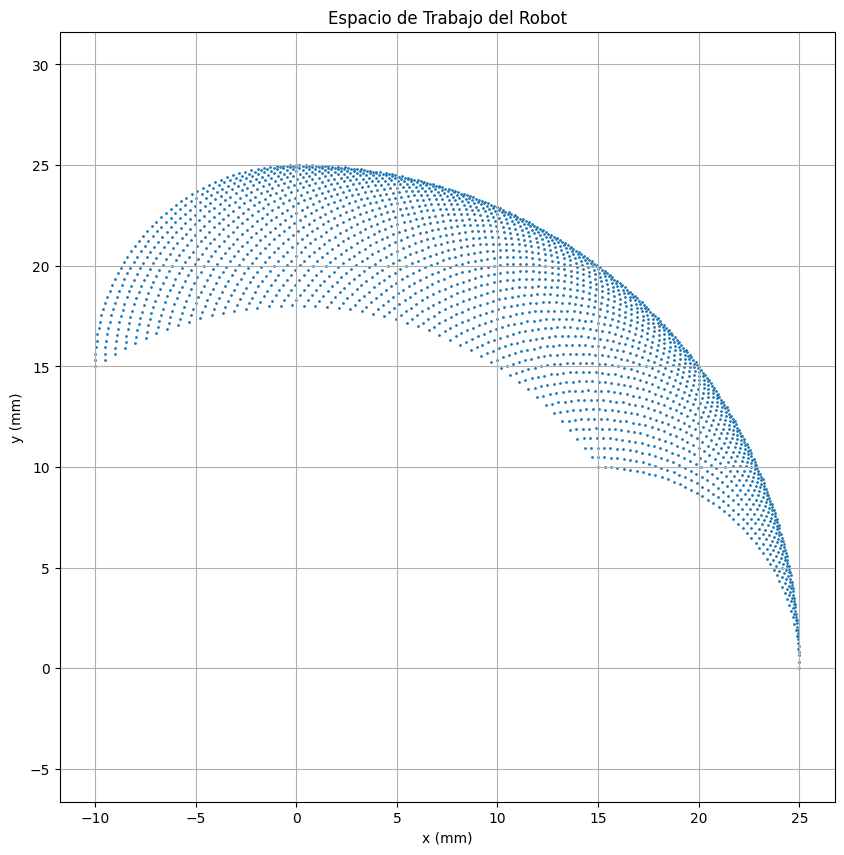

In [61]:
# Dibujar el espacio de trabajo
plt.figure(figsize=(10, 10))
plt.scatter(x_vals, y_vals, s=1)
plt.xlabel('x (mm)')
plt.ylabel('y (mm)')
plt.title('Espacio de Trabajo del Robot')
plt.grid(True)
plt.axis('equal')
plt.show()